## Question 2 (20 Points)

You are provided with historical daily returns for AAPL stock in the file `aapl_returns.csv`. Use this data to calculate and analyze the tail risk of the stock.

- **(5 Points)** Compute the 99% Value at Risk (VaR) using empirical distribution based on the historical return data.
  
- **(5 Points)** Compute the 99% VaR using the normal distribution assumption, where μ and σ are estimated from the historical return data.

- **(10 Points)** Compare the two VaR values obtained from the empirical method and the normal distribution assumption. Discuss the reasons for any differences and the implications for risk management in practice.


### Load Dataset

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load daily returns data from given csv file
data = pd.read_csv('aapl_return.csv') 
returns = data['Returns']  

### Part 1

In [10]:
# Compute the 99% Value at Risk (VaR) using empirical distribution
def empirical_var(returns, confidence_level=0.99):
    return -np.percentile(returns, (1 - confidence_level) * 100)

empirical_var_99 = empirical_var(returns)
print(f"99% Empirical VaR: ${empirical_var_99:.2f}")


99% Empirical VaR: $0.08


### Part 2

In [11]:
# Compute the 99% VaR using the normal distribution assumption
mean_return = returns.mean()
std_dev = returns.std()

normal_var_99 = -stats.norm.ppf(1 - 0.99, loc=mean_return, scale=std_dev)
print(f"99% Normal Distribution VaR: ${normal_var_99:.2f}")


99% Normal Distribution VaR: $0.07


### Part 3

In [12]:
# Compare the two VaR values and discuss
print("\nComparison of VaR values:")
print(f"Empirical VaR: ${empirical_var_99:.2f}")
print(f"Normal Distribution VaR: ${normal_var_99:.2f}")

# Discussion on differences
if empirical_var_99 != normal_var_99:
    print("\nThe two VaR values differ. This can be due to:")
    print("- The empirical VaR captures the actual tail risk based on historical data.")
    print("- The normal VaR assumes returns are normally distributed, which may not hold true in practice.")
    print("- Implications for risk management: Relying solely on normal distribution assumptions may underestimate risk.")
else:
    print("\nThe two VaR values are the same.")


Comparison of VaR values:
Empirical VaR: $0.08
Normal Distribution VaR: $0.07

The two VaR values differ. This can be due to:
- The empirical VaR captures the actual tail risk based on historical data.
- The normal VaR assumes returns are normally distributed, which may not hold true in practice.
- Implications for risk management: Relying solely on normal distribution assumptions may underestimate risk.


The two VaR values differ. This can be due to:
- The empirical VaR captures the actual tail risk based on historical data (reflecting actual losses in historical data).
- The normal VaR assumes returns are normally distributed, which may not hold true in practice.
- In the market, during times of volatility or market stress, actual losses that were recorded may be larger than what normal distribution predicts. This can lead to the difference between the outputs of empirical and normal VaR.



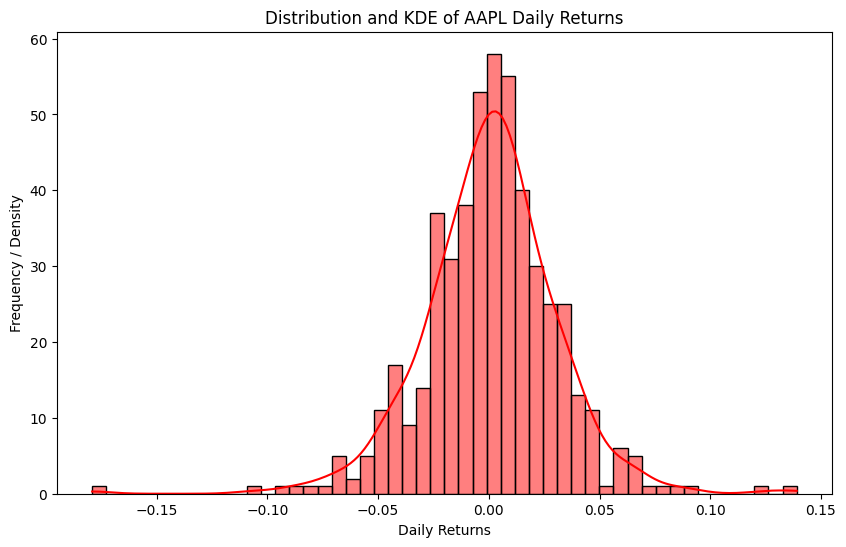

In [15]:
#  histogram and KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=50, color='red', edgecolor='black', kde=True)
plt.title('Distribution and KDE of AAPL Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency / Density')
plt.show()

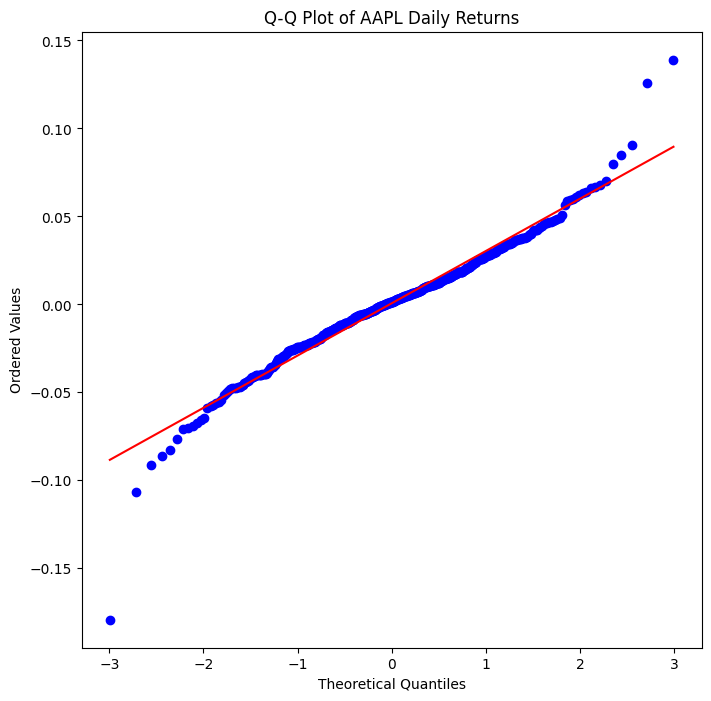

In [16]:
# QQ plot to compare returns to normal distribution
plt.figure(figsize=(8, 8))
stats.probplot(returns, dist="norm", plot=plt)
plt.title('Q-Q Plot of AAPL Daily Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


We can see that the tails shown by the QQ-plot deviate from the normal theoretical quantiles (Fat Tails) and this is a shortcoming of the normal VaR approach, that is fails to properly capture fat tails in returns distributions.

In [ ]:
# Perform shapiro-wilk test for normality
shapiro_test = stats.shapiro(returns)
print("\nShapiro-Wilk Test for Normality:")
print(f"Test Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

# Conclusion based on Shapiro-Wilk test
if shapiro_test.pvalue > 0.05:
    print("\nThe p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("The returns are normally distributed.")
else:
    print("\nThe p-value is less than 0.05, so we reject the null hypothesis.")
    print("The returns are not normally distributed.")
    print("This indicates that the normal distribution assumption for VaR may not be appropriate.")


Shapiro-Wilk Test for Normality:
Test Statistic: 0.9639175693577792
P-value: 8.974727159621074e-10

The p-value is less than 0.05, so we reject the null hypothesis.
The returns are not normally distributed.
This indicates that the normal distribution assumption for VaR may not be appropriate.


Even though the distribution plots show an approximately normal distribution characteristic, the QQ-plot and normality tests indicates otherwise. 

Implications for risk management: 
- Relying solely on normal distribution assumptions may underestimate risk.
- Such inadequate risk management can understate potential losses.
- This approach also fails to consider multi-factor exposures that introduce inherent risk premiums to a given portfolio.